# Lezhin Data Challenge 2017 - Simple EDA

### **Columns Information**

* Feature 수: 167개

    * 0 : label 해당 유저가 목록에 진입하고 1시간 이내에 구매했는지 여부
    * 1 : 사용 플랫폼 A
    * 2 : 사용 플랫폼 B
    * 3 : 사용 플랫폼 C
    * 4 : 사용 플랫폼 D
    * 5 : 목록 진입시점 방문 총 세션 수 (범위별로 부여된 순차 ID)
    * 6 : 작품을 나타내는 해쉬
    * 7-9 : 개인정보
    * 10-109 : 주요 작품 구매 여부
    * 110 : 작품 태그 정보
    * 111 : 구매할 때 필요한 코인
    * 112 : 완결 여부
    * 113-122 : 스케쥴 정보
    * 123-140 : 장르 정보
    * 141 : 해당 작품의 마지막 에피소드 발행 시점 (범위별로 부여된 순차 ID)
    * 142 : 단행본 여부
    * 143 : 작품 발행 시점 (범위별로 부여된 순차 ID)
    * 144 : 총 발행 에피소드 수 (범위별로 부여된 순차 ID)
    * 145-150 : 작품 태그 정보
    * 151-166 : 유저의 성향 정보 (과거에 구매를 했을 때만 기록)

## 목차

* Settings
* 사용 플랫폼별 1시간 이내 구매 여부 관계
* 목록 진입시점 방문 총 세션 수와 1시간 이내 구매 여부 관계
* 작품과 1시간 이내 구매 여부 관계
* 주요 작품 구매 여부와 1시간 이내 구매 여부 관계
* 작품 태그 정보와 1시간 이내 구매 여부 관계
* 구매할 때 필요한 코인과 1시간 이내 구매 여부 관계
* 완결여부와 1시간 이내 구매 여부 관계
* 스케쥴 정보와 1시간 이내 구매 여부 관계
* 장르 정보와 1시간 이내 구매 여부 관계
* 유저 성향 정보와 1시간 이내 구매 여부 관계

목차 항목은 [전영호님의 Data Exploration](https://github.com/ForwardYH/Lezin-Data-Challenge/blob/master/1.%20Lezin%20Data%20Challenge%20-%20Data%20Exploration.ipynb)을 참고했습니다.

## Settings

In [0]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import plotly as py
import seaborn as sns

In [0]:
# !apt-get install fonts-nanum* -qq

In [0]:
fm._rebuild()

In [0]:
mpl.rc('font', family='nanumgothic')
mpl.rc('axes', unicode_minus=False)

In [6]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
data = pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/lezhin_dataset_v2_training.tsv", sep="\t", header=None)

In [8]:
data.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 650965 entries, 0 to 650964
Columns: 167 entries, 0 to 166
dtypes: float64(16), int64(148), object(3)
memory usage: 919.7 MB


## 사용 플랫폼별 1시간 이내 구매 여부 관계

In [9]:
data[[1, 2, 3, 4]].head()

,1,2,3,4
0,0,0,0,1
1,0,0,0,1
2,0,0,0,1
3,0,0,0,1
4,0,0,0,1


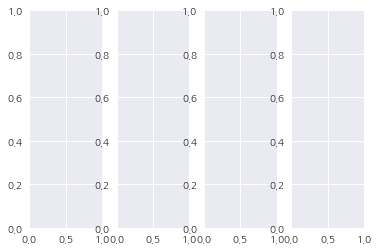

In [10]:
fig, axes = plt.subplots(1, 4)

In [11]:
platform = pd.DataFrame(index=range(1,5), columns=["조회수", "구매수"])
platform

,조회수,구매수
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN


In [0]:
for i in range(1,5):
  platform.loc[i]["조회수"] = data[data[i] == 1].shape[0]

In [0]:
for i in range(1, 5):
  platform.loc[i]["구매수"] = data[(data[i] == 1) & (data[0] == 1)].shape[0]

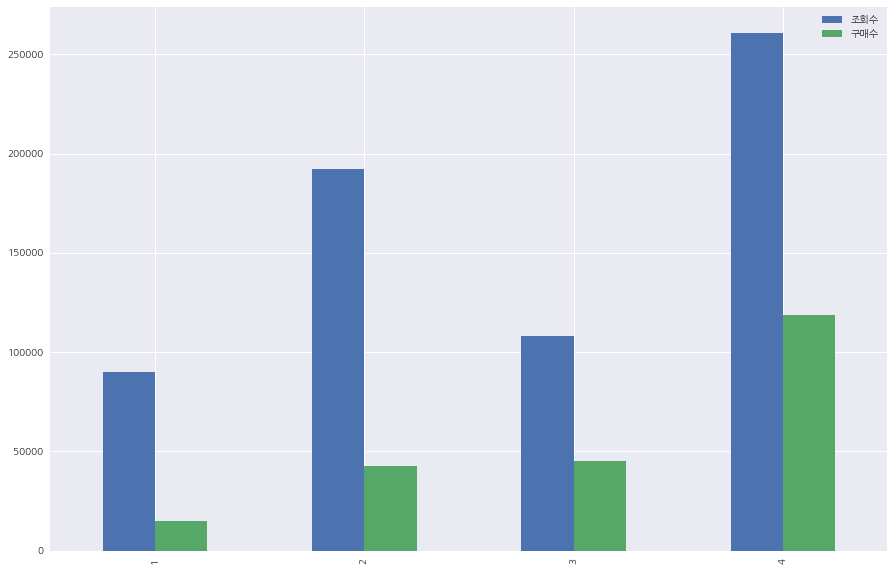

In [14]:
platform.plot.bar(figsize=(15,10))

## 목록 진입시점 방문 총 세션 수와 1시간 이내 구매 여부 관계

In [0]:
t_session = pd.DataFrame({
    "ORDERED":data[0],
    "SessionID":data[5]
})

In [0]:
t_session = t_session.groupby(['SessionID', 'ORDERED']).size().unstack().fillna(0)

In [17]:
t_session.columns = ['X', 'O']
t_session.head()

,X,O
SessionID,,
1,12927.0,11205.0
2,6114.0,4235.0
3,5242.0,3244.0
4,4720.0,2769.0
5,4690.0,2539.0


In [0]:
t_session = pd.DataFrame(
    {
        "총 방문수": t_session["X"] + t_session["O"],
        "구매": t_session["O"]
    },
    index=t_session.index,
    columns=["총 방문수", "구매"]
)

In [19]:
t_session.head()

,총 방문수,구매
SessionID,,
1,24132.0,11205.0
2,10349.0,4235.0
3,8486.0,3244.0
4,7489.0,2769.0
5,7229.0,2539.0


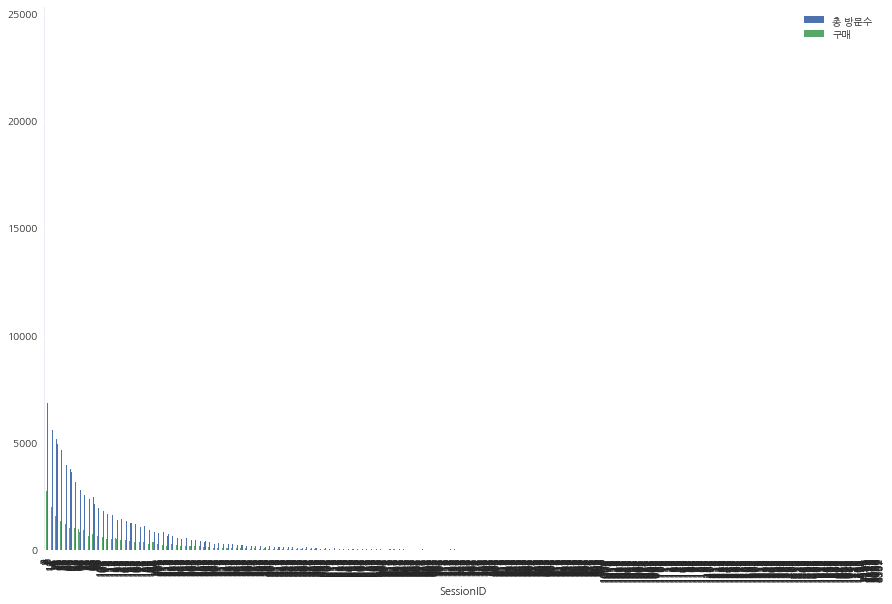

In [20]:
t_session.plot.bar(figsize=(15, 10))

## 작품과 1시간 이내 구매 여부 관계

In [0]:
title_df = pd.DataFrame(
    {
        "작품명": data[6],
        "구매여부": data[0]
    }
)

In [0]:
title_df = title_df.groupby(["작품명", "구매여부"]).size().unstack().fillna(0)

In [23]:
title_df = pd.DataFrame(
    {
        "조회수": title_df[0] + title_df[1],
        "구매": title_df[1]
    },
    index=title_df.index,
    columns=['조회수', "구매"]
).sort_values(by="조회수", ascending=False)
title_df

,조회수,구매
작품명,,
6983846D,9690.0,3035.0
00A49090,8782.0,5298.0
0365FD34,8443.0,2029.0
621BF66D,7665.0,3318.0
D619AC7D,7380.0,5684.0
0757A410,6644.0,289.0
37C9A863,6487.0,1117.0
85803B60,6083.0,3894.0
AC627AB1,5667.0,903.0


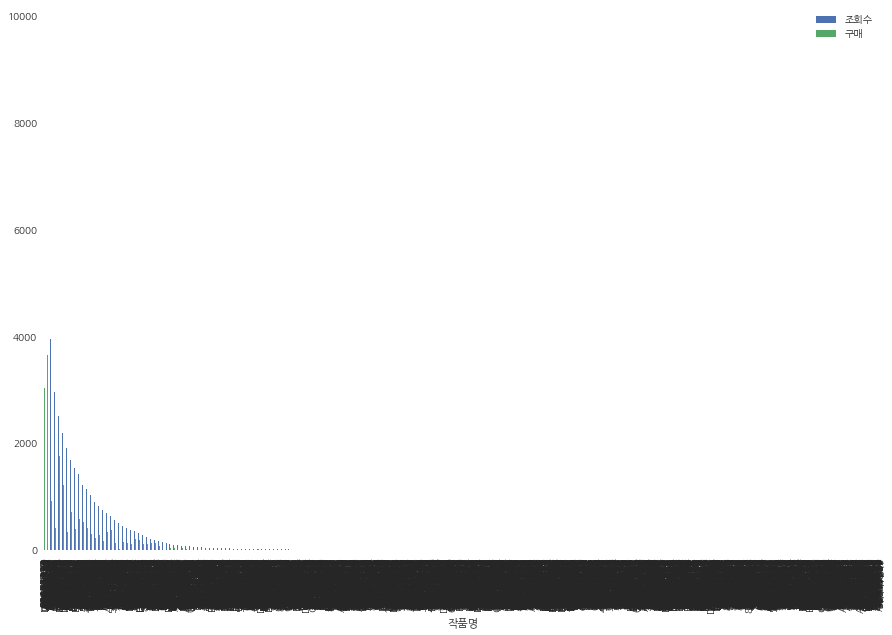

In [24]:
title_df.plot.bar(figsize=(15, 10))

## 주요 작품 구매 여부와 1시간 이내 구매 여부 관계

* 각 컬럼의 값을 작품 구매 횟수(회차)로 보기로 했다.

In [25]:
main_product = data[[0] + list(range(10,110))]
main_product.head()

,0,10,11,12,13,14,15,16,17,18,...,100,101,102,103,104,105,106,107,108,109
0,0,0,11,0,0,1,12,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,25,6,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,34,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,6,0,0,0,0,...,0,0,0,0,0,6,0,0,0,0


### 주요 작품별 구매 여부와 1시간 이내 구매 여부 관계

In [26]:
mp_purchased = pd.DataFrame(index=range(10,110), columns=['총 조회수', '구매'])
mp_purchased

,총 조회수,구매
10,NaN,NaN
11,NaN,NaN
12,NaN,NaN
13,NaN,NaN
14,NaN,NaN
15,NaN,NaN
16,NaN,NaN
17,NaN,NaN
18,NaN,NaN
19,NaN,NaN


In [0]:
for i in range(10, 110):
  mp_purchased.loc[i]['총 조회수'] = main_product[main_product[i] > 0].shape[0]

In [0]:
for i in range(10, 110):
  mp_purchased.loc[i]['구매'] = main_product[((main_product[0] == 1) & (main_product[i] > 0))].shape[0]

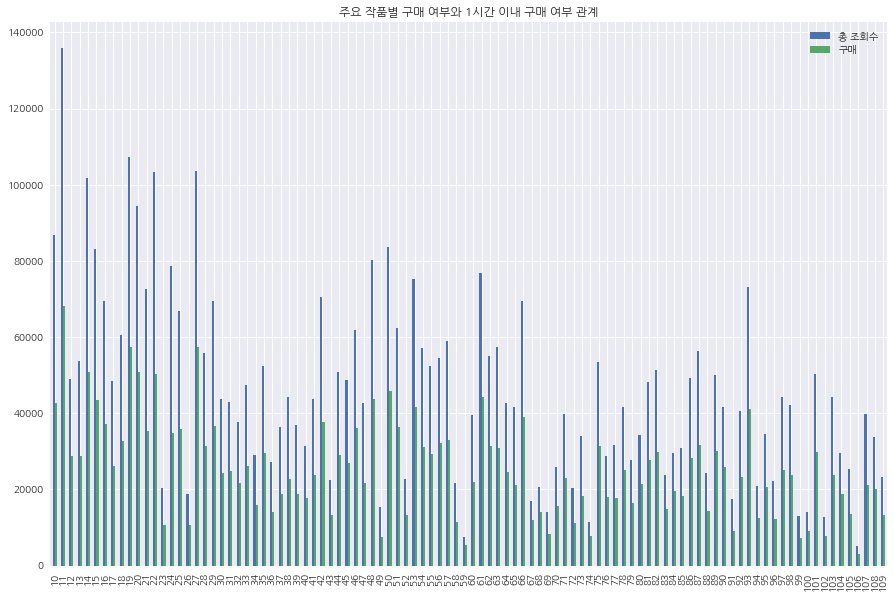

In [29]:
mp_purchased.plot.bar(figsize=(15,10),
                     title="주요 작품별 구매 여부와 1시간 이내 구매 여부 관계")

### data[0] == 1일 때, 주요 작품별 구매 정보

한번 추가해봤다

In [30]:
main_product[11].nlargest().values[0]

37

In [0]:
mp_info = pd.DataFrame(index=range(10,110), columns=['최댓값', '평균값'])

In [0]:
for i in range(10, 110):
  mp_info.loc[i]['최댓값'] = main_product[i].nlargest().values[0]

In [0]:
for i in range(10, 110):
  mp_info.loc[i]['평균값'] = main_product[i].mean()

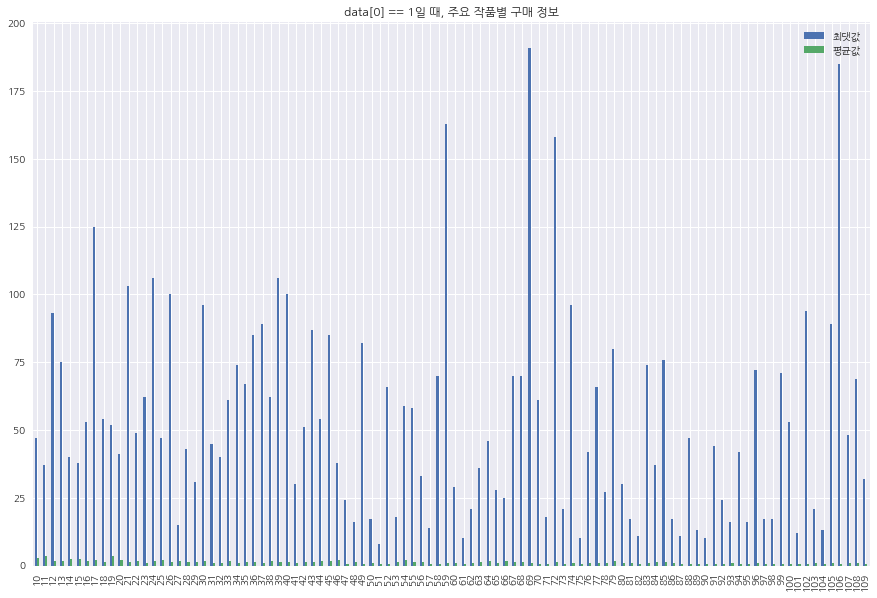

In [34]:
mp_info.plot.bar(figsize=(15,10),
                title="data[0] == 1일 때, 주요 작품별 구매 정보")

## 작품 태그 정보와 1시간 이내 구매 여부 관계

In [35]:
data[110].value_counts()

0    405882
1    245083
Name: 110, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



Text(6.8,0.5,'구매율')

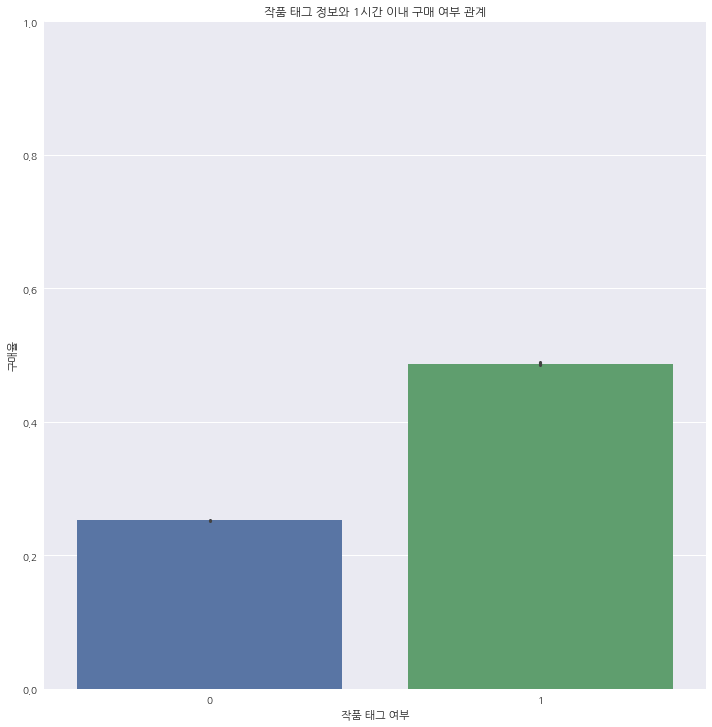

In [36]:
sns.factorplot(x=110, y=0, data=data, kind="bar", size=10)
plt.ylim(0,1)
plt.title("작품 태그 정보와 1시간 이내 구매 여부 관계")
plt.xlabel("작품 태그 여부")
plt.ylabel("구매율")

작품 태그가 있을 때 구매율이 더 높아

## 구매할 때 필요한 코인과 1시간 이내 구매 여부 관계

In [37]:
data[111].value_counts(sort=False)

0      60518
1       2242
2     116680
3     445848
4      23421
5       1180
50      1076
Name: 111, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



(0, 1)

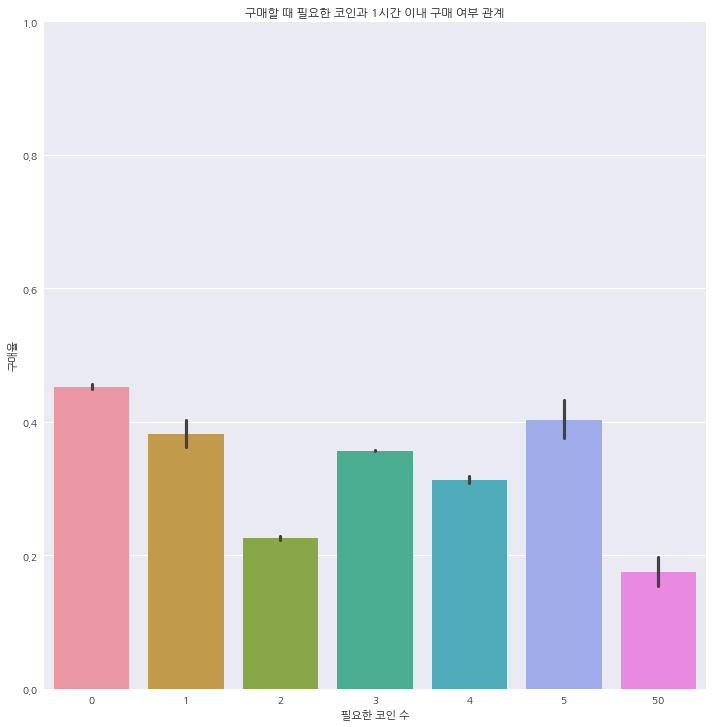

In [38]:
sns.factorplot(x=111, y=0, data=data, kind="bar", size=10)
plt.title("구매할 때 필요한 코인과 1시간 이내 구매 여부 관계")
plt.xlabel("필요한 코인 수")
plt.ylabel("구매율")
plt.ylim(0,1)

0, 5, 1, 3, 4, 2, 50 코인 순으로 구매율이 높다

## 완결여부와 1시간 이내 구매 여부 관계

In [39]:
data[112].value_counts()

0    518854
1    132111
Name: 112, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



(0, 1)

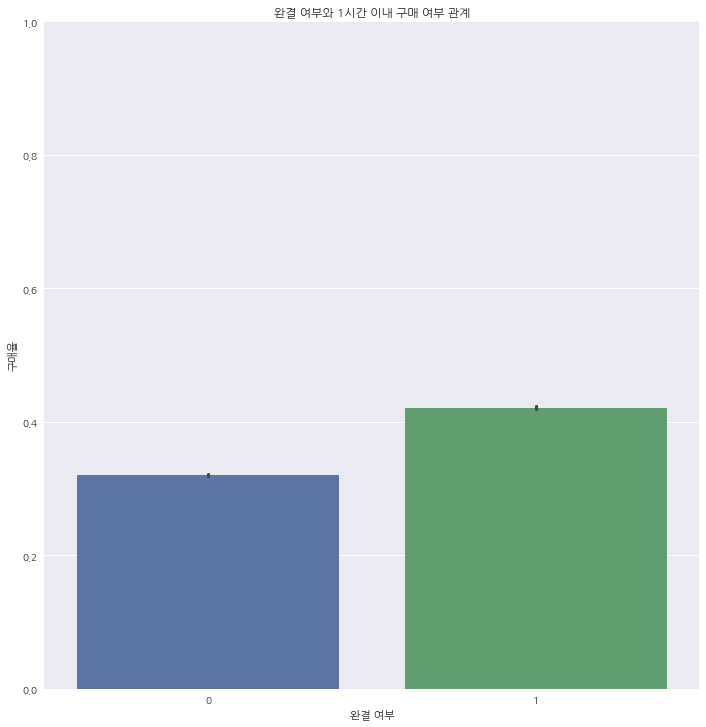

In [40]:
sns.factorplot(x=112, y=0, data=data, kind="bar", size=10)
plt.title("완결 여부와 1시간 이내 구매 여부 관계")
plt.xlabel("완결 여부")
plt.ylabel("구매율")
plt.ylim(0,1)

완결된 작품의 구매율이 더 높은 것을 알 수 있다.

## 스케쥴 정보와 1시간 이내 구매 여부 관계

In [41]:
# 113-122
data[list(range(113,123))].head()

,113,114,115,116,117,118,119,120,121,122
0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0


In [0]:
schedule = pd.DataFrame(index=range(113,123), columns=["조회수", "구매수"])

In [43]:
for i in range(113, 123):
  schedule.loc[i]["조회수"] = data[data[i] == 1].shape[0]
schedule

,조회수,구매수
113,67120,NaN
114,62017,NaN
115,87714,NaN
116,67548,NaN
117,66626,NaN
118,58734,NaN
119,79912,NaN
120,93935,NaN
121,1012,NaN
122,269,NaN


In [0]:
for i in range(113, 123):
  schedule.loc[i]["구매수"] = data[(data[i] == 1) & (data[0] == 1)].shape[0]

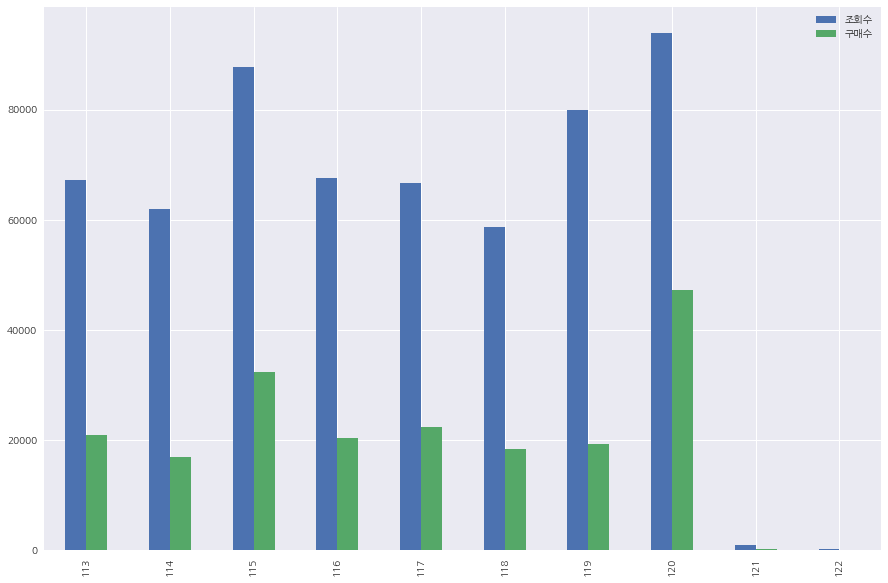

In [45]:
schedule.plot.bar(figsize=(15,10))

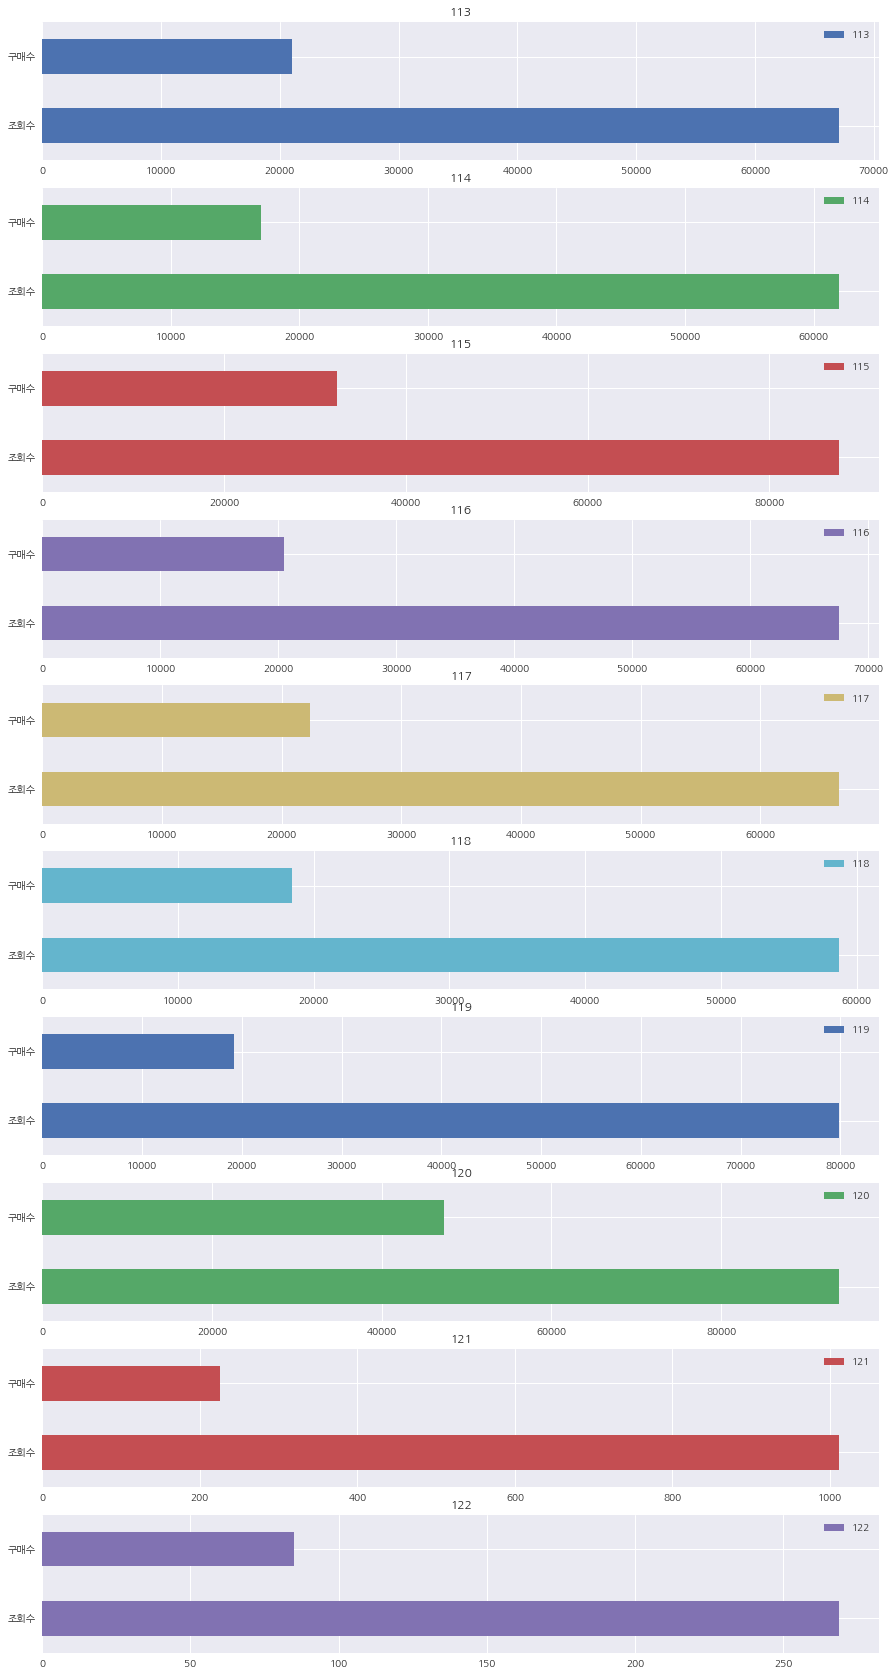

In [46]:
_ = schedule.T.plot.barh(figsize=(15,30), subplots=True, sharex=False)

## 장르 정보와 1시간 이내 구매 여부 관계

In [47]:
# 123-140
data[list(range(123,141))].head()

,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140
0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [48]:
genre = pd.DataFrame(index=range(123,141), columns=["조회수", "구매수"])
genre

,조회수,구매수
123,NaN,NaN
124,NaN,NaN
125,NaN,NaN
126,NaN,NaN
127,NaN,NaN
128,NaN,NaN
129,NaN,NaN
130,NaN,NaN
131,NaN,NaN
132,NaN,NaN


In [49]:
for i in range(123, 141):
  genre.loc[i]["조회수"] = data[data[i] == 1].shape[0]
genre

,조회수,구매수
123,41903,NaN
124,208487,NaN
125,166800,NaN
126,60745,NaN
127,129414,NaN
128,93641,NaN
129,2848,NaN
130,100788,NaN
131,24137,NaN
132,8101,NaN


In [50]:
for i in range(123, 141):
  genre.loc[i]["구매수"] = data[(data[i] == 1) & (data[0] == 1)].shape[0]
genre

,조회수,구매수
123,41903,13139
124,208487,103035
125,166800,73249
126,60745,15655
127,129414,32207
128,93641,29962
129,2848,1198
130,100788,26606
131,24137,7445
132,8101,2231


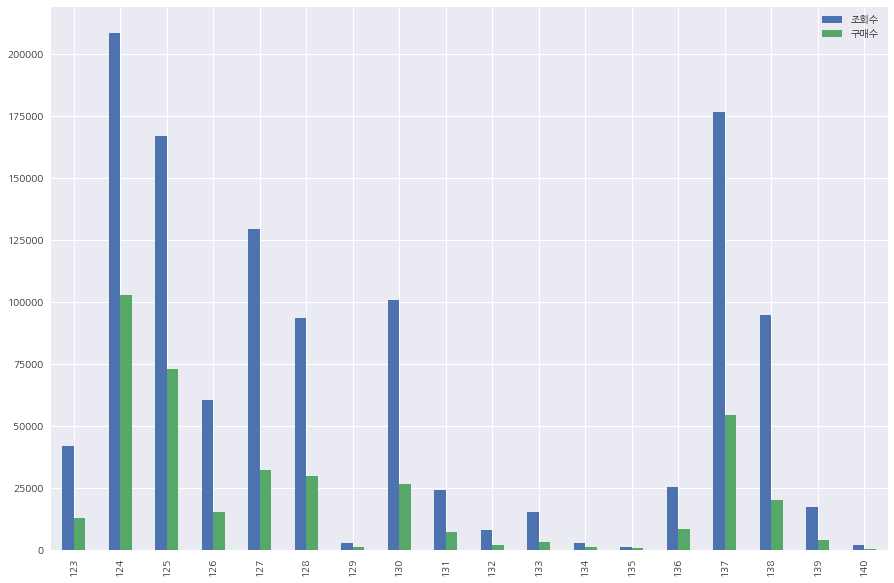

In [51]:
_ = genre.plot.bar(figsize=(15, 10))

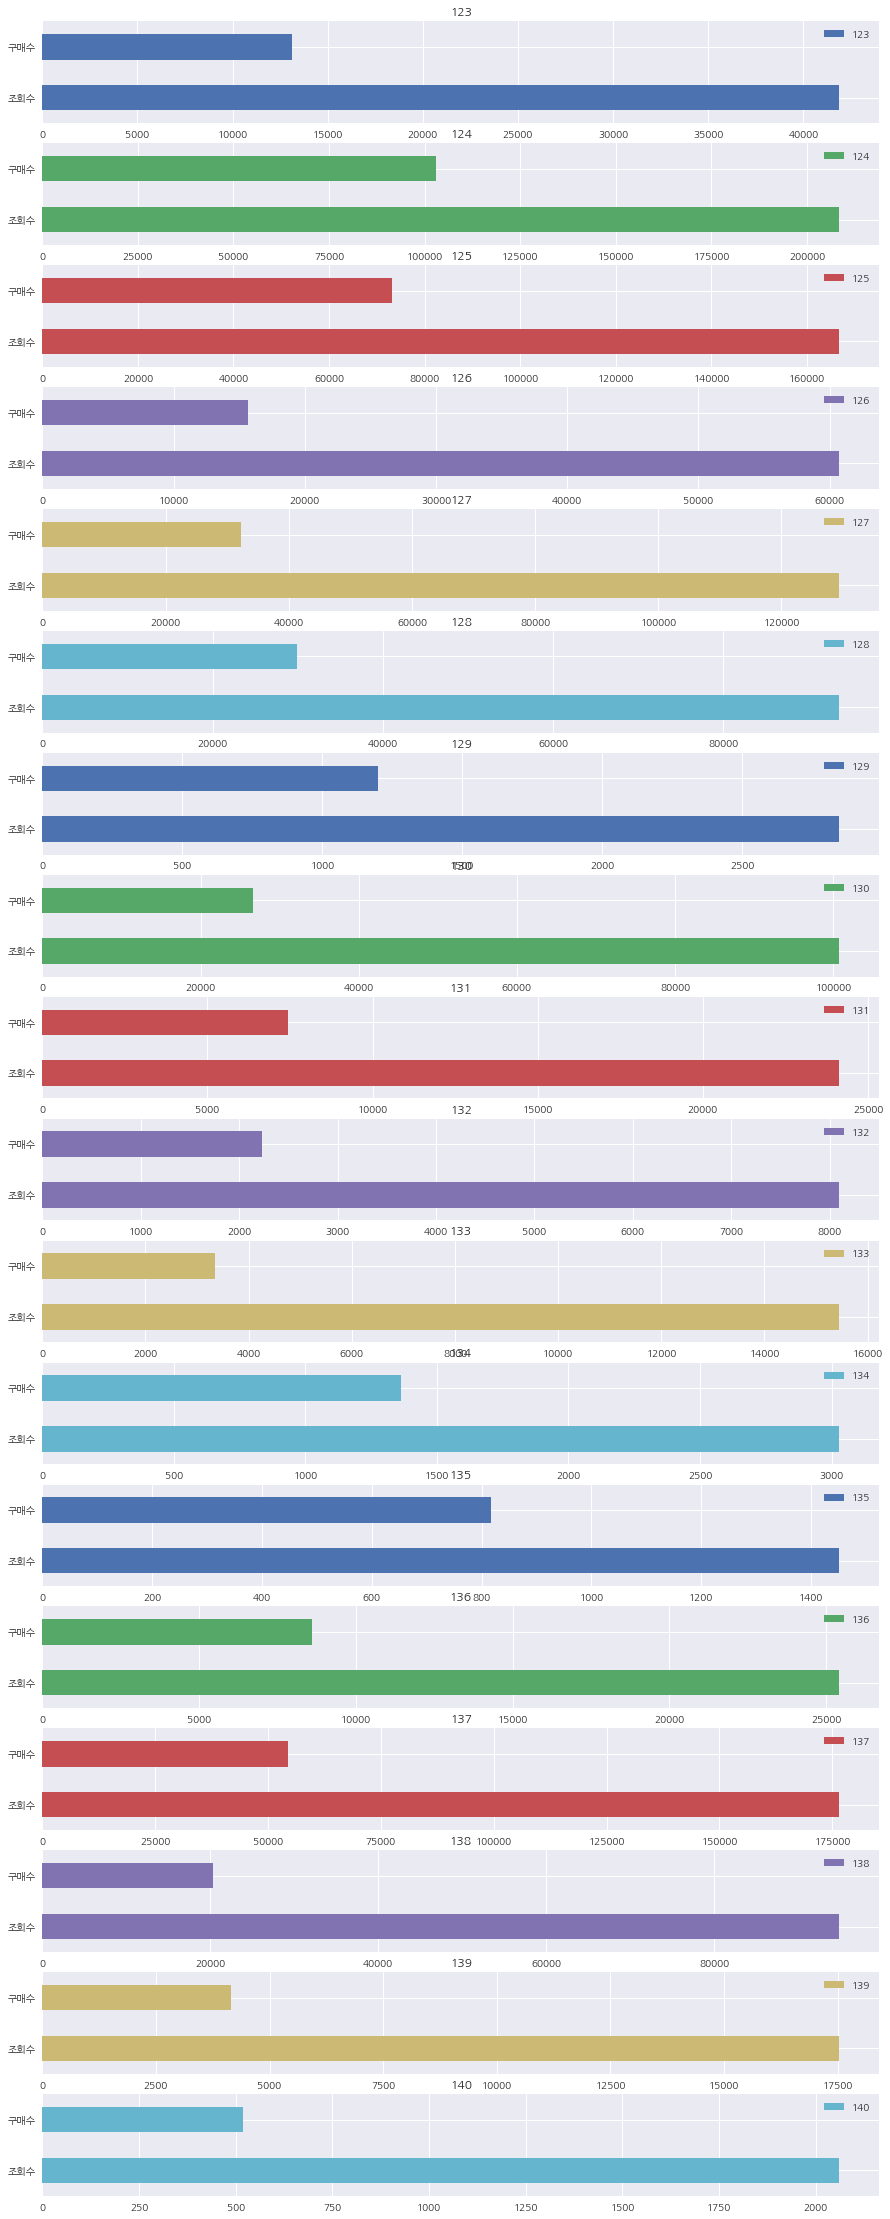

In [52]:
_ = genre.T.plot.barh(figsize=(15,40), subplots=True, sharex=False)

## 유저 성향 정보와 1시간 이내 구매 여부 관계

In [53]:
# 151-166
user_data = data[[0] + list(range(151, 167))].fillna(0)
user_data.head()

,0,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166
0,0,0.0,0.1952,0.3310,0.0,0.1490,0.0000,0.0,0.0000,0.0000,0.0,0.0,0.0,0.2580,0.0030,0.0,0.0
1,0,0.0,0.0000,0.0000,0.0,0.0000,0.0000,0.0,0.5000,0.0000,0.0,0.0,0.0,0.5000,0.0000,0.0,0.0
2,0,0.0,0.4615,0.4596,0.0,0.0142,0.0072,0.0,0.0187,0.0047,0.0,0.0,0.0,0.0287,0.0055,0.0,0.0
3,0,0.0,0.8390,0.0813,0.0,0.0611,0.0000,0.0,0.0000,0.0000,0.0,0.0,0.0,0.0186,0.0000,0.0,0.0
4,0,0.0,0.1571,0.4217,0.0,0.0368,0.0140,0.0,0.0207,0.0000,0.0,0.0,0.0,0.2805,0.0692,0.0,0.0


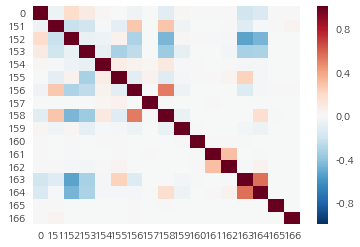

In [54]:
sns.heatmap(user_data.corr())